In [1]:
from braincoder.models import GaussianPRF
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:


keys = ['H1A (closely-spaced RFs for narrow range)', 'H1B (wide-spaced RFs for wide range)',
        'H2A (narrow RFs for narrow range)', 'H2B (wide RFs for wide range)',
        'H3A (lower amplitudes for narrow range)', 'H3B (higher amplitudes for wide range)']

parameters_H1a = pd.DataFrame({'mu':np.linspace(10, 25, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})
parameters_H1b = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})

parameters_H2a = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})
parameters_H2b = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*10., 'amplitude':1.0, 'baseline':0.0})

parameters_H3a = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})
parameters_H3b = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.5, 'baseline':0.0})

parameters = pd.concat((parameters_H1a, parameters_H1b, parameters_H2a, parameters_H2b, parameters_H3a, parameters_H3b), keys=keys, names=['hypothesis'])

In [5]:
pred = []
for hypothesis, pars in parameters.groupby('hypothesis'):

    model = GaussianPRF(parameters=parameters, paradigm=np.linspace(10, 40, 100))
    p = model.predict()
    p.index = pd.Index(np.linspace(10, 40, 100), name='stimulus')
    p.columns.name = 'rf'

    pred.append(p)

pred = pd.concat(pred) 

In [6]:
pred = pred.stack([0, 1]).to_frame('activity')
pred.index.set_names('rf', level=-1, inplace=True)

In [8]:
sns.color_

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_85405/2924934892.py", line 1, in <module>
    sns.co
AttributeError: module 'seaborn' has no attribute 'co'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_traceback(
 

[(0.0, 0.0, 0.7255235294117647),
 (0.0, 0.7385313725490196, 0.0),
 (1.0, 0.1764705882352941, 0.0)]

In [21]:
sns.color_palette?

Signature: sns.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
Docstring:
Return a list of colors or continuous colormap defining a palette.

Possible ``palette`` values include:
    - Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
    - Name of matplotlib colormap
    - 'husl' or 'hls'
    - 'ch:<cubehelix arguments>'
    - 'light:<color>', 'dark:<color>', 'blend:<color>,<color>',
    - A sequence of colors in any format matplotlib accepts

Calling this function with ``palette=None`` will return the current
matplotlib color cycle.

This function can also be used in a ``with`` statement to temporarily
set the color cycle for a plot or set of plots.

See the :ref:`tutorial <palette_tutorial>` for more information.

Parameters
----------
palette : None, string, or sequence, optional
    Name of palette or None to return current palette. If a sequence, input
    colors are used but possibly cycled and desaturated.
n_colors : int, optional
 

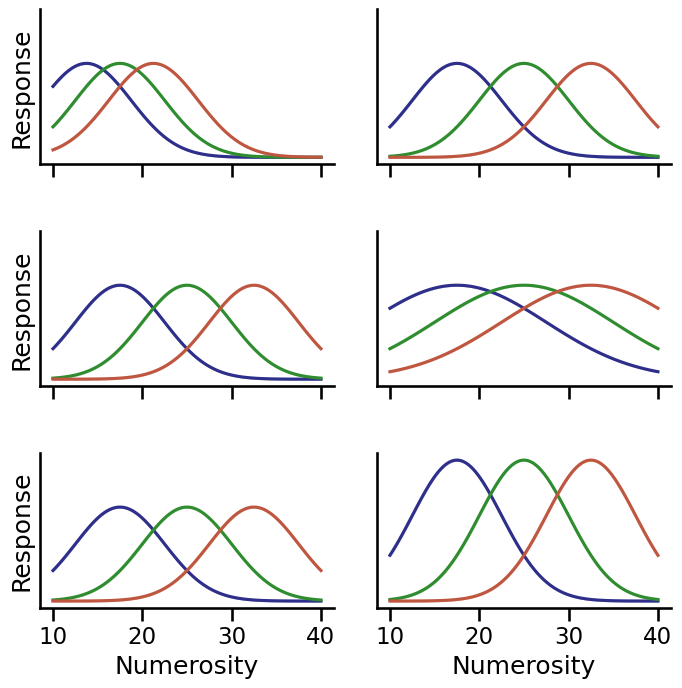

In [22]:
sns.set_context('talk')
g = sns.relplot(x='stimulus', hue='rf', y='activity', col='hypothesis', data=pred.reset_index(), kind='line', col_wrap=2, legend=False, aspect=1.5, height=2.5,
palette=sns.color_palette('nipy_spectral', 5, desat=.5)[::2],
col_order=keys)
                # col_order=['H1A (closely-spaced RFs for narrow range)', 'H2A (narrow RFs for narrow range)', 'H3A (lower amplitudes for narrow range)',
                #             'H1B (wide-spaced RFs for wide range)', 'H2B (wide RFs for wide range)', 'H3B (higher amplitudes for wide range)'])

g.set_titles('')
g.set(xlabel='Numerosity', ylabel='Response', yticks=[])

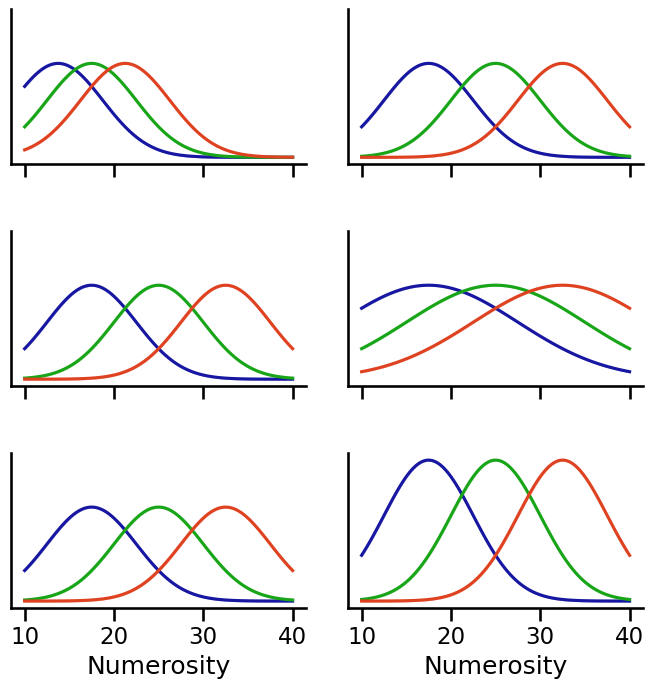

In [24]:
sns.set_context('talk')
g = sns.relplot(x='stimulus', hue='rf', y='activity', col='hypothesis', data=pred.reset_index(), kind='line', col_wrap=2, legend=False, aspect=1.5, height=2.5,
palette=sns.color_palette('nipy_spectral', 5, desat=.75)[::2],
col_order=keys)
                # col_order=['H1A (closely-spaced RFs for narrow range)', 'H2A (narrow RFs for narrow range)', 'H3A (lower amplitudes for narrow range)',
                #             'H1B (wide-spaced RFs for wide range)', 'H2B (wide RFs for wide range)', 'H3B (higher amplitudes for wide range)'])

g.set_titles('')
g.set(xlabel='Numerosity', ylabel='', yticks=[])

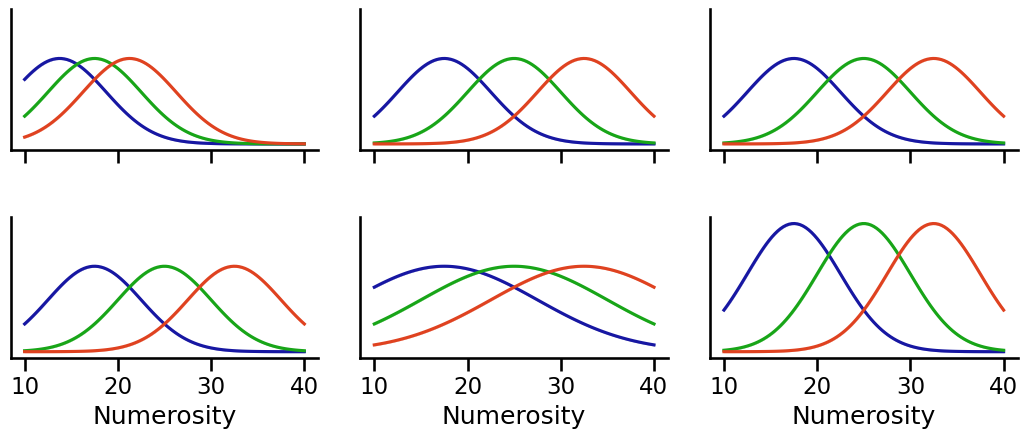

In [26]:
sns.set_context('talk')
g = sns.relplot(x='stimulus', hue='rf', y='activity', col='hypothesis', data=pred.reset_index(), kind='line', col_wrap=3, legend=False, aspect=1.5, height=2.5,
palette=sns.color_palette('nipy_spectral', 5, desat=.75)[::2],
                col_order=['H1A (closely-spaced RFs for narrow range)', 'H2A (narrow RFs for narrow range)', 'H3A (lower amplitudes for narrow range)',
                            'H1B (wide-spaced RFs for wide range)', 'H2B (wide RFs for wide range)', 'H3B (higher amplitudes for wide range)'])

g.set_titles('')
g.set(xlabel='Numerosity', ylabel='', yticks=[])

In [ ]:
grid_parameters

,mu,sd,amplitude,baseline
unit,,,,
0,76.052635,5.000000,1.000000,0.000000
1,16.842106,5.000000,0.120697,-0.227612
2,76.052635,5.000000,1.000000,0.000000
3,80.000000,5.000000,1.000000,0.000000
4,76.052635,5.000000,1.000000,0.000000
...,...,...,...,...
73070,36.578949,36.315788,0.270551,-0.184275
73071,36.578949,40.000000,0.337972,-0.540824
73072,76.052635,5.000000,1.000000,0.000000
